In [1]:
import pandas as pd

# Load your CSV (adjust the path if needed)
df = pd.read_csv("/content/HCI A3 Post Task Flori (Responses) - Form responses 1.csv")

# ============================
# Define column groups
# ============================

# SUS questions (assume these are the first 10 columns based on your CSV)
sus_cols = [
    "I think that I would like to use this system frequently",
    "I found the system unnecessarily complex",
    "I thought the system was easy to use",
    "I think that I would need the support of a technical person to be able to use this system",
    "I found the various functions in this system were well integrated",
    "I thought there was too much inconsistency in this system",
    "I would imagine that most people would learn to use this system very quickly",
    "I found the system very cumbersome to use",
    "I felt very confident using the system",
    "I needed to learn a lot of things before I could get going with this system "
]

# NASA-TLX (assume columns 11–16, adjust if necessary)
nasa_tlx_cols = [
    "Mental Demand",
    "Physical Demand",
    "Temporal Demand",
    "Performance",
    "Effort",
    "Frustration"
]

# Custom Likert items (all remaining columns)
custom_likert_cols = [col for col in df.columns if col not in sus_cols + nasa_tlx_cols]

# ============================
# Split the DataFrames
# ============================

df_sus = df[sus_cols]
df_nasa = df[nasa_tlx_cols]
df_custom = df[custom_likert_cols]

# Optional: save to separate CSVs
df_sus.to_csv("sus_responses.csv", index=False)
df_nasa.to_csv("nasa_tlx_responses.csv", index=False)
df_custom.to_csv("custom_likert_responses.csv", index=False)

# Optional: check shapes
print("SUS shape:", df_sus.shape)
print("NASA-TLX shape:", df_nasa.shape)
print("Custom Likert shape:", df_custom.shape)


SUS shape: (5, 10)
NASA-TLX shape: (5, 6)
Custom Likert shape: (5, 11)


In [2]:
df_sus

,I think that I would like to use this system frequently,I found the system unnecessarily complex,I thought the system was easy to use,I think that I would need the support of a technical person to be able to use this system,I found the various functions in this system were well integrated,I thought there was too much inconsistency in this system,I would imagine that most people would learn to use this system very quickly,I found the system very cumbersome to use,I felt very confident using the system,I needed to learn a lot of things before I could get going with this system
0,5,2,5,1,4,3,3,4,4,2
1,4,2,4,2,5,4,5,2,4,2
2,4,1,5,1,4,2,5,2,4,2
3,4,1,5,1,5,1,5,1,5,1
4,5,1,5,1,5,2,5,1,5,1


In [3]:
df_nasa

,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
0,3,2,3,2,3,1
1,3,2,1,1,3,3
2,2,2,2,2,2,2
3,3,1,3,1,3,1
4,2,1,3,5,1,1


In [4]:
# SUS scoring: Odd items (1,3,5,...) subtract 1, Even items subtract from 5
sus_scores = []
for index, row in df_sus.iterrows():
    score = 0
    for i, col in enumerate(sus_cols):
        val = row[col]
        if i % 2 == 0:  # odd-numbered questions (0-indexed)
            score += (val - 1)
        else:           # even-numbered questions
            score += (5 - val)
    sus_score = score * 2.5  # convert to 0–100 scale
    sus_scores.append(sus_score)

df['SUS_Score'] = sus_scores

# NASA-TLX: simple unweighted average across the six dimensions (0–5 scale)
df['NASA_TLX_Score'] = df_nasa.mean(axis=1)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

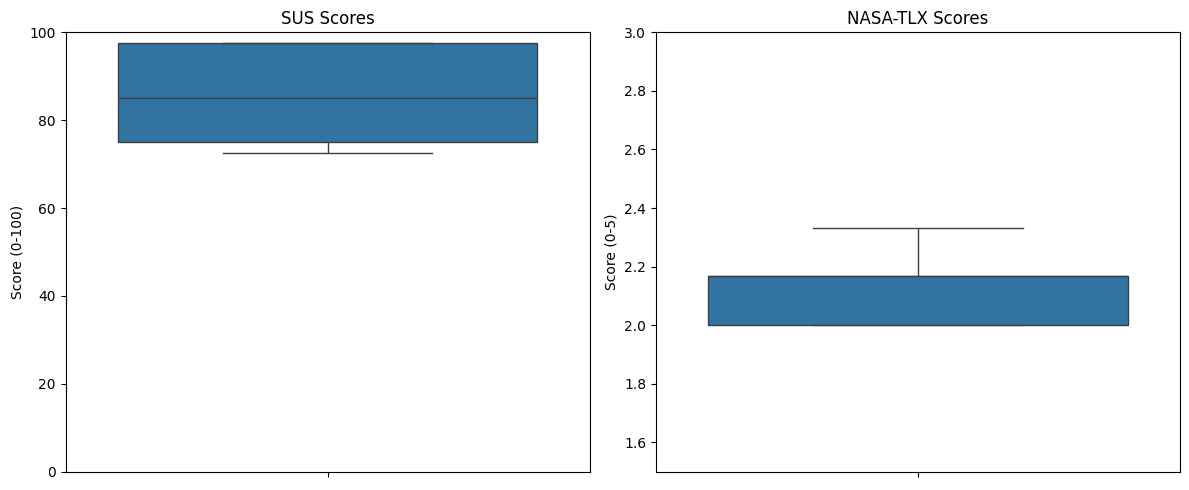

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['SUS_Score'])
plt.title("SUS Scores")
plt.ylabel("Score (0-100)")
plt.ylim(0, 100) # Set y-axis limit for SUS scores

plt.subplot(1,2,2)
sns.boxplot(y=df['NASA_TLX_Score'])
plt.title("NASA-TLX Scores")
plt.ylabel("Score (0-5)")
plt.ylim(1.5, 3) # Set y-axis limit for NASA-TLX scores

plt.tight_layout()
plt.show()

The SUS score of 85.5 is in the “excellent” usability range according to Sauro & Lewis benchmarks, confirming students perceive the AI-assisted food management system as highly usable.

## Define hypotheses

For SUS, comparing the sample mean to the “golden standard” benchmark of 68:

Null hypothesis (H₀): The system usability is less than or equal to the benchmark.

1. H0:μ≤68

Alternative hypothesis (H₁): The system usability is better than the benchmark.

2. H1:μ>68

Significance level:
α=0.05


In [7]:
from scipy import stats
import numpy as np

# Your SUS scores
sus_scores = df['SUS_Score']

# One-sided t-test: H0: mean <= 68, H1: mean > 68
t_stat, p_value_two_sided = stats.ttest_1samp(sus_scores, 68)
# Convert to one-sided p-value
p_value_one_sided = p_value_two_sided / 2 if np.mean(sus_scores) > 68 else 1 - (p_value_two_sided / 2)

print(f"Mean SUS: {np.mean(sus_scores):.2f}")
print(f"Std SUS: {np.std(sus_scores, ddof=1):.2f}")

print(f"T-statistic: {t_stat:.2f}")
print(f"One-sided p-value: {p_value_one_sided:.4f}")
cohens_d = (np.mean(sus_scores) - 68) / np.std(sus_scores, ddof=1)
print(f"Cohen's d vs benchmark: {cohens_d:.2f}")



Mean SUS: 85.50
Std SUS: 11.91
T-statistic: 3.29
One-sided p-value: 0.0152
Cohen's d vs benchmark: 1.47


Since p=0.0152<α=0.05, we reject the null hypothesis.


**Cohen's d** measures the magnitude of difference between sample mean and benchmark:

Interpretation:
* 0.2 → small effect
* 0.5 → medium effect
* 0.8 → large effect

**d=1.47** → very large effect, indicating the usability improvement is substantial, not just statistically significant.

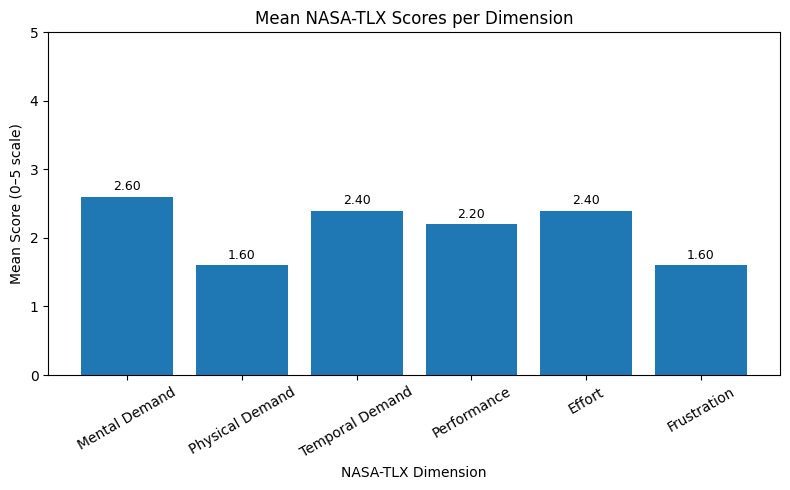

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example columns in df_nasa:
# ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']

# Compute means
nasa_means = df_nasa.mean()

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(nasa_means.index, nasa_means.values)
plt.title("Mean NASA-TLX Scores per Dimension")
plt.xlabel("NASA-TLX Dimension")
plt.ylabel("Mean Score (0–5 scale)")
plt.ylim(0, 5)
plt.xticks(rotation=30)

# Add mean values on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f"{bar.get_height():.2f}",
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()


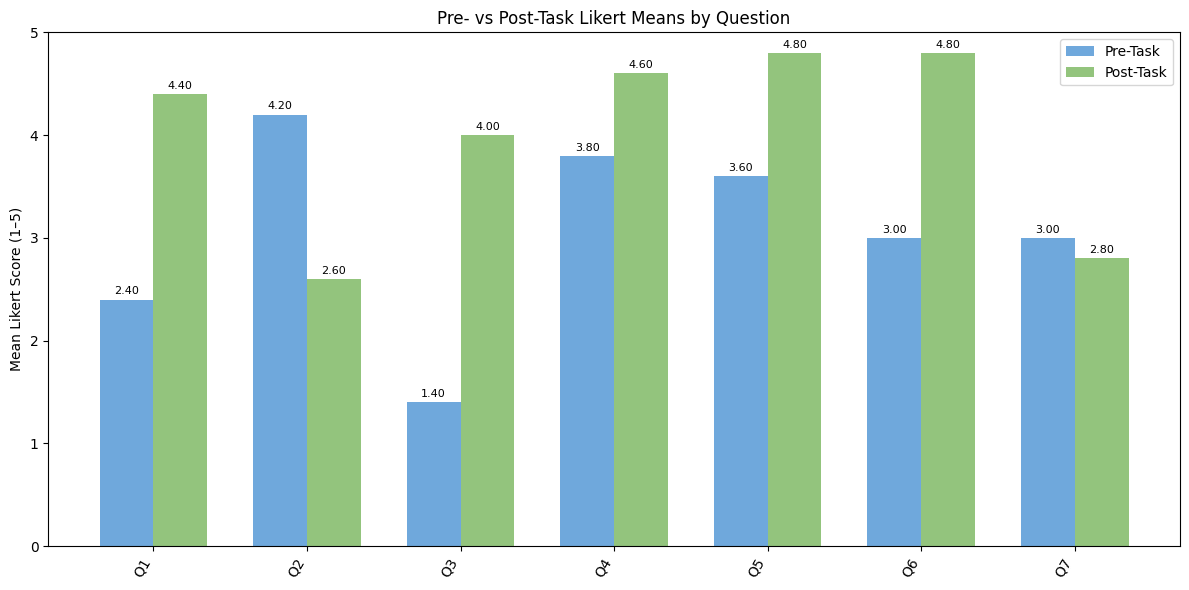

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read both CSVs
df_pre = pd.read_csv("/content/HCI A3 Pre Task Flori (Responses) - Form responses 1.csv")

# Drop timestamp columns
df_pre_clean = df_pre.iloc[:, 1:]
df_post_clean = df_custom.iloc[:, 1:]

# Align only matching questions (columns in pre)
common_cols = df_pre_clean.columns.intersection(df_post_clean.columns)
df_pre_common = df_pre_clean[common_cols]
df_post_common = df_post_clean[common_cols]

# Calculate means
pre_means = df_pre_common.mean()
post_means = df_post_common.mean()

# Plot side-by-side bar chart
x = np.arange(len(common_cols))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, pre_means, width, label='Pre-Task', color='#6FA8DC')
plt.bar(x + width/2, post_means, width, label='Post-Task', color='#93C47D')

plt.xticks(x, ['Q1','Q2','Q3','Q4','Q5','Q6','Q7'], rotation=60, ha='right')
plt.ylabel('Mean Likert Score (1–5)')
plt.title('Pre- vs Post-Task Likert Means by Question')
plt.ylim(0, 5)
plt.legend()

# Add mean labels
for i, v in enumerate(pre_means):
    plt.text(i - width/2, v + 0.05, f"{v:.2f}", ha='center', fontsize=8)
for i, v in enumerate(post_means):
    plt.text(i + width/2, v + 0.05, f"{v:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import ttest_rel, wilcoxon

In [18]:
# Map questions to subgroups
inventory_cols = ['I am aware of the expiry dates of the food I have in my kitchen.',
                  'I know where I can donate leftover food in my local area.',
                  'I can distinguish which foods are still safe to eat after the printed expiry date, and which are not.']

food_mgmt_cols = ['I am likely to throw food away if it has reached the expiry date.',
                  'I know how to make good use of all the food I have in my kitchen.',
                  'I feel confident in planning meals to minimize food waste.',
                  'I often forget about items in my kitchen until they go bad.']

impact_cols = ['The app helps me become more aware of how much food I have and what might go to waste.',
               'The app makes food management feel more complicated than it should be.',
               'Using the app would help me reduce my overall food waste in the long term.']

# Reverse scoring where needed (e.g., negative phrased questions)
# These need to be subtracted from 6 because scale is 1-5
reverse_cols = ['I am likely to throw food away if it has reached the expiry date.',
                'I often forget about items in my kitchen until they go bad.'
                'The app makes food management feel more complicated than it should be.']

# Identify which columns are common between pre and post (pre does not have impact questions)
common_cols = df_pre_clean.columns.intersection(df_post_clean.columns)

# Only use common columns for comparison
df_pre_common = df_pre_clean[common_cols]
df_post_common = df_post_clean[common_cols]

# Reverse scoring for common columns only
reverse_cols = ['I am likely to throw food away if it has reached the expiry date.',
                'I often forget about items in my kitchen until they go bad.']

reverse_cols = [col for col in reverse_cols if col in common_cols]  # remove non-common
df_pre_common[reverse_cols] = 6 - df_pre_common[reverse_cols]
df_post_common[reverse_cols] = 6 - df_post_common[reverse_cols]

# Update subgroup lists to only include columns present in pre
inventory_cols_common = [col for col in inventory_cols if col in common_cols]
food_mgmt_cols_common = [col for col in food_mgmt_cols if col in common_cols]

# Compute subgroup means
def compute_subgroup_means(df):
    return pd.DataFrame({
        'Inventory Awareness': df[inventory_cols_common].mean(axis=1),
        'Food Management': df[food_mgmt_cols_common].mean(axis=1)
    })

pre_means = compute_subgroup_means(df_pre_common)
post_means = compute_subgroup_means(df_post_common)

# Display mean values
print("Pre-task means:\n", pre_means.mean())
print("Post-task means:\n", post_means.mean())

# Paired t-test and Wilcoxon
for subgroup in pre_means.columns:
    t_stat, t_p = ttest_rel(post_means[subgroup], pre_means[subgroup])
    w_stat, w_p = wilcoxon(post_means[subgroup], pre_means[subgroup])
    print(f"\n{subgroup}:")
    print(f"  Paired t-test: t={t_stat:.3f}, p={t_p:.3f}")
    print(f"  Wilcoxon signed-rank test: W={w_stat:.3f}, p={w_p:.3f}")

Pre-task means:
 Inventory Awareness    1.90
Food Management        3.65
dtype: float64
Post-task means:
 Inventory Awareness    4.2
Food Management        4.0
dtype: float64

Inventory Awareness:
  Paired t-test: t=7.667, p=0.002
  Wilcoxon signed-rank test: W=0.000, p=0.062

Food Management:
  Paired t-test: t=2.746, p=0.052
  Wilcoxon signed-rank test: W=0.000, p=0.125


/tmp/ipython-input-2458022935.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_common[reverse_cols] = 6 - df_post_common[reverse_cols]


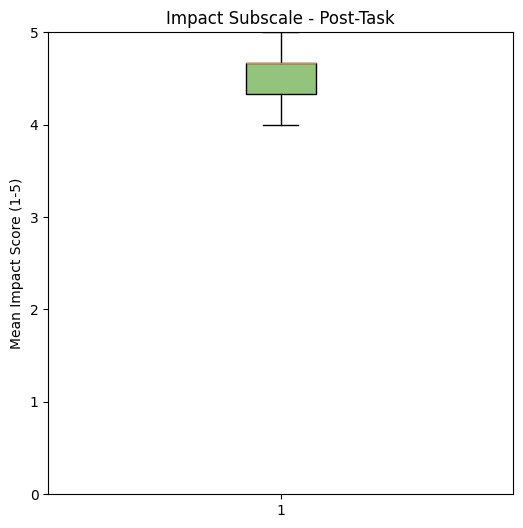

In [22]:
# Define Impact questions
impact_cols = [
    'The app helps me become more aware of how much food I have and what might go to waste.',
    'The app makes food management feel more complicated than it should be. ',
    'Using the app would help me reduce my overall food waste in the long term. '
]

# Reverse-score negatively phrased questions
reverse_cols = ['The app makes food management feel more complicated than it should be. ']
df_post_clean[reverse_cols] = 6 - df_post_clean[reverse_cols]  # scale 1-5

# Compute mean Impact score per participant
df_post_clean['Impact_Mean'] = df_post_clean[impact_cols].mean(axis=1)

# Plot boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_post_clean['Impact_Mean'], patch_artist=True, boxprops=dict(facecolor='#93C47D'))
plt.ylabel('Mean Impact Score (1-5)')
plt.title('Impact Subscale - Post-Task')
plt.ylim(0,5)
plt.show()

In [23]:
impact_mean = df_post_clean['Impact_Mean'].mean()
print(f"Mean Impact score (post-task): {impact_mean:.2f}")


Mean Impact score (post-task): 4.53
